In [1]:
import pandas as pd

In [4]:
rape_data = pd.read_csv('../Data/Violent/20_Victims_of_rape.csv')

In [5]:
# Convert 'STATE/UT' to uppercase
rape_data['Area_Name'] = rape_data['Area_Name'].str.upper()

# Perform the groupby operation correctly
statewise = rape_data.groupby(['Area_Name', 'Year'])[['Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_of_Rape_Total','Victims_Upto_10_Yrs']].sum()

# Reset the index to work with row-wise totals
statewise_reset = statewise.reset_index()

# Calculate the row-wise total for each row
statewise_reset['Total'] = statewise_reset[['Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_of_Rape_Total','Victims_Upto_10_Yrs']].sum(axis=1)

# Display the resulting DataFrame with row-wise totals
statewise_reset


,Area_Name,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Total
0,ANDAMAN & NICOBAR ISLANDS,2001,6,0,0,6,0,0,6,0,18
1,ANDAMAN & NICOBAR ISLANDS,2002,4,0,0,2,2,0,4,0,12
2,ANDAMAN & NICOBAR ISLANDS,2003,4,0,0,2,0,0,4,2,12
3,ANDAMAN & NICOBAR ISLANDS,2004,20,0,2,14,2,2,20,0,60
4,ANDAMAN & NICOBAR ISLANDS,2005,8,0,0,4,4,0,8,0,24
...,...,...,...,...,...,...,...,...,...,...,...
345,WEST BENGAL,2006,3462,0,10,26,2954,468,3462,4,10386
346,WEST BENGAL,2007,4212,10,84,72,2956,1062,4212,28,12636
347,WEST BENGAL,2008,4526,2,106,108,3258,1008,4526,44,13578
348,WEST BENGAL,2009,4672,0,36,170,3670,784,4672,12,14016


In [6]:
# Save the combined data to a new CSV file
statewise_reset.to_csv("../Data/Violent/rape_statewise.csv", index=False)

In [17]:
# Year-wise data
rape_data = pd.read_csv('../Data/Violent/rape_statewise.csv')
year_wise = rape_data.groupby('Year')[['Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_of_Rape_Total','Victims_Upto_10_Yrs']].sum()
year_wise_reset = year_wise.reset_index()
# year_wise_reset['Total'] = year_wise_reset[['Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_of_Rape_Total','Victims_Upto_10_Yrs']].sum(axis=1)
year_wise_reset

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,2001,32150,136,2880,7822,15762,4496,32156,1060
1,2002,32746,132,1708,2650,21460,5984,32756,822
2,2003,31694,120,1862,3584,19746,5622,31712,778
3,2004,36466,162,2180,4008,22686,6378,36478,1064
4,2005,36718,222,2348,4688,21618,6762,36752,1114
5,2006,38696,188,2162,6728,22624,6004,38730,1024
6,2007,41474,266,2710,6304,23968,7060,41542,1234
7,2008,42934,272,2662,6992,24598,7168,42970,1278
8,2009,42794,190,3520,5824,25624,6248,42826,1420
9,2010,44344,272,2808,7140,25498,7526,44386,1142


In [18]:
# Save the combined data to a new CSV file
year_wise_reset.to_csv("../Data/Violent/rape_yearwise.csv", index=False)

In [11]:
# from yearwise take data and add column population and literacy rate from population.csv
population_data = pd.read_csv('../population.csv')
population_data = population_data[['Year','Population', 'Literacy Rate']]
year_wise_data = pd.read_csv('../Data/Violent/rape_yearwise.csv')
merged_df = pd.merge(year_wise_data, population_data, on='Year', how='inner')
merged_df['Crime_Rate'] = merged_df['Total'] / merged_df['Population'] * 1000000
merged_df

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Total,Population,Literacy Rate,Crime_Rate
0,2001,32150,136,2880,7822,15762,4496,32156,1060,96462,1078970907,64.83,89.401854
1,2002,32746,132,1708,2650,21460,5984,32756,822,98258,1098313039,65.69,89.462655
2,2003,31694,120,1862,3584,19746,5622,31712,778,95118,1117415123,66.57,85.123244
3,2004,36466,162,2180,4008,22686,6378,36478,1064,109422,1136264583,67.46,96.299754
4,2005,36718,222,2348,4688,21618,6762,36752,1114,110222,1154638713,68.36,95.460163
5,2006,38696,188,2162,6728,22624,6004,38730,1024,116156,1172373788,69.28,99.077616
6,2007,41474,266,2710,6304,23968,7060,41542,1234,124558,1189691809,70.20,104.697703
7,2008,42934,272,2662,6992,24598,7168,42970,1278,128874,1206734806,71.14,106.795627
8,2009,42794,190,3520,5824,25624,6248,42826,1420,128446,1223640160,72.09,104.970402
9,2010,44344,272,2808,7140,25498,7526,44386,1142,133116,1240613620,73.06,107.298516


/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 21:26:34.400084: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-31 21:26:34.400116: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-31 21:26:34.400124: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-31 21:26:34.400171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-31 21:26:34.400187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
                            MAE         R²  Accuracy (%)
Linear Regression    977.313296   0.925002     92.500169
Random Forest        489.700000   0.987932     98.793186
Gradient Boosting    646.757295   0.982650     98.265005
Neural Network     37708.800583 -56.334957      0.162032


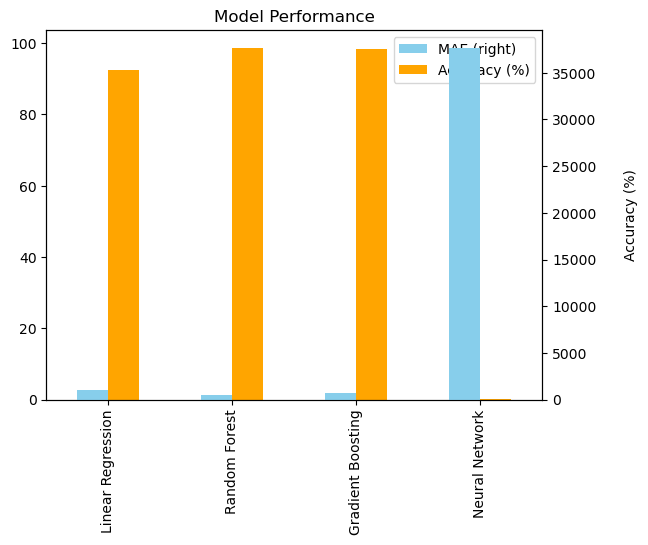

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load your dataset
data = merged_df

# Feature Engineering
data['Yearly_Change'] = data['Rape_Cases_Reported'].diff().fillna(0)
data['Victim_Age_Ratio_10_14'] = data['Victims_Between_10-14_Yrs'] / data['Victims_of_Rape_Total']
data['Victim_Age_Ratio_14_18'] = data['Victims_Between_14-18_Yrs'] / data['Victims_of_Rape_Total']
data['Victim_Age_Ratio_18_30'] = data['Victims_Between_18-30_Yrs'] / data['Victims_of_Rape_Total']
data['Victim_Age_Ratio_30_50'] = data['Victims_Between_30-50_Yrs'] / data['Victims_of_Rape_Total']
data['Victims_Upto_10_Ratio'] = data['Victims_Upto_10_Yrs'] / data['Victims_of_Rape_Total']
data['Population_Growth_Rate'] = data['Population'].pct_change().fillna(0)
data['Literacy_Rate_Change'] = data['Literacy Rate'].diff().fillna(0)
data['Crime_Rate_Change'] = data['Crime_Rate'].diff().fillna(0)

# Selecting features and target variable
features = [
    'Year',
    'Population_Growth_Rate', 'Literacy_Rate_Change', 
    'Crime_Rate_Change'
]
target = 'Rape_Cases_Reported'

# Splitting the dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate custom accuracy-like metric
    threshold = 5
    accuracy = model.score(X_test, y_test) * 100  # Using R² as a proxy for accuracy

    results[model_name] = {'MAE': mae, 'R²': r2, 'Accuracy (%)': accuracy}

# Neural Network Model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the neural network model
nn_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=5, verbose=0)

# Evaluate the neural network
nn_y_pred = nn_model.predict(X_test_scaled)
nn_mae = mean_absolute_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
nn_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)[0]  # Using loss as a proxy

results['Neural Network'] = {'MAE': nn_mae, 'R²': nn_r2, 'Accuracy (%)': (1 - nn_mae / np.mean(y_test)) * 100}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

# Plotting the performance of each model
results_df[['MAE', 'Accuracy (%)']].plot(kind='bar', secondary_y='MAE', title='Model Performance', color=['skyblue', 'orange'])
plt.ylabel('Mean Absolute Error')
plt.ylabel('Accuracy (%)', labelpad=20)
plt.show()


/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
                        MAE        R²
Linear Regression  0.514214  0.999997
Random Forest      3.808619  0.998990
Gradient Boosting  2.965300  0.999823
Neural Network     3.029839  0.999942


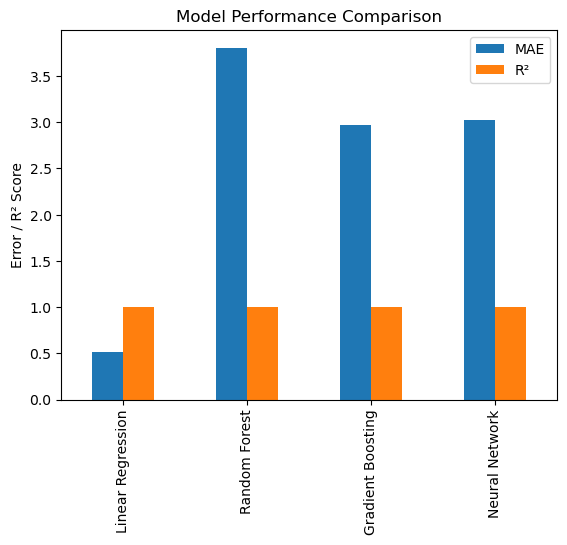

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv('../Data/Violent/20_victims_of_rape.csv')

# Preprocessing
X = data.drop(columns=['Rape_Cases_Reported'])
y = data['Rape_Cases_Reported']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Victims_Above_50_Yrs', 'Victims_Between_10-14_Yrs', 
                                    'Victims_Between_14-18_Yrs', 'Victims_Between_18-30_Yrs',
                                    'Victims_Between_30-50_Yrs', 'Victims_of_Rape_Total', 
                                    'Victims_Upto_10_Yrs']),
        ('cat', OneHotEncoder(), ['Area_Name', 'Subgroup'])
    ]
)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the features
X_transformed = pipeline.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MAE': mae, 'R²': r2}

# Build and train the neural network model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Train the neural network model
nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=5, verbose=0)

# Evaluate the neural network
nn_y_pred = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

results['Neural Network'] = {'MAE': nn_mae, 'R²': nn_r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

# Optionally, plot the results
import matplotlib.pyplot as plt

results_df[['MAE', 'R²']].plot(kind='bar', title='Model Performance Comparison')
plt.ylabel('Error / R² Score')
plt.show()


In [ ]:
for model in models:
    print(f"{model}: MAE = {results[model]['MAE']}, R² = {results[model]['R²']}, Accuracy = {}")

In [12]:
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target = merged_df['Total']

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    accuracy = model.score(X_test, y_test)

    print(f'{model_name} Mean Squared Error: {mse}')
    print(f'{model_name} Accuracy: {accuracy}\n')

    # Plotting actual vs predicted values
    plt.scatter(y_test, predictions, label=model_name, alpha=0.6)

# Step 5: Formatting the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted for Different Models')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 6: Predicting future values
future_years = pd.DataFrame({
    'Year': [2016, 2025, 2026],
    'Population': [1340935791, 1400000000, 1450000000],  # Example future population figures
    'Literacy Rate': [77, 80, 90]  # Example future literacy rates
})

for model_name, model in models.items():
    future_predictions = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions}")


ValueError: Found input variables with inconsistent numbers of samples: [10, 19]

Linear Regression for Total Mean Squared Error: 12717447.940858899
Linear Regression for Total Accuracy: 0.944179814266975

Random Forest for Total Mean Squared Error: 1311160.6099999868
Random Forest for Total Accuracy: 0.9942449751619677

Gradient Boosting for Total Mean Squared Error: 2857865.606590278
Gradient Boosting for Total Accuracy: 0.9874560847662397

Support Vector Regression for Total Mean Squared Error: 227854067.1223213
Support Vector Regression for Total Accuracy: -0.00011074595632543094



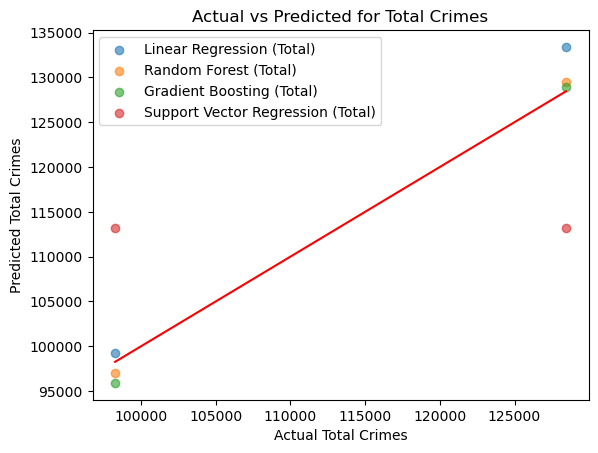

Linear Regression for Crime Rate Mean Squared Error: 8.808668123423672
Linear Regression for Crime Rate Accuracy: 0.853488141675327

Random Forest for Crime Rate Mean Squared Error: 2.1001622877660227
Random Forest for Crime Rate Accuracy: 0.9650686488294665

Gradient Boosting for Crime Rate Mean Squared Error: 3.3448112269447208
Gradient Boosting for Crime Rate Accuracy: 0.9443667871534669

Support Vector Regression for Crime Rate Mean Squared Error: 59.66436776047243
Support Vector Regression for Crime Rate Accuracy: 0.007620984935468367



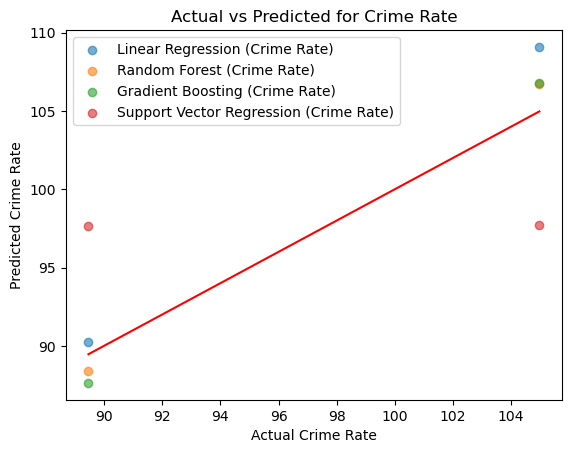

Linear Regression Future Predictions for Total Crimes: [ 392.12290809 1726.87716497  206.04155055]
Random Forest Future Predictions for Total Crimes: [106.92277002 106.92277002 106.92277002]
Gradient Boosting Future Predictions for Total Crimes: [107.2982295 107.2982295 107.2982295]
Support Vector Regression Future Predictions for Total Crimes: [97.81681416 97.85290245 97.88072834]
Linear Regression Future Predictions for Crime Rate: [ 392.12290809 1726.87716497  206.04155055]
Random Forest Future Predictions for Crime Rate: [106.92277002 106.92277002 106.92277002]
Gradient Boosting Future Predictions for Crime Rate: [107.2982295 107.2982295 107.2982295]
Support Vector Regression Future Predictions for Crime Rate: [97.81681416 97.85290245 97.88072834]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models, including SVM
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')  # Using RBF kernel
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'Year': [2016, 2025, 2026],
    'Population': [1340935791, 1400000000, 1450000000],  # Example future population figures
    'Literacy Rate': [77, 80, 90]  # Example future literacy rates
})
# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")


Linear Regression for Total Mean Squared Error: 12717447.940858899
Linear Regression for Total Accuracy: 0.944179814266975

Random Forest for Total Mean Squared Error: 1311160.6099999868
Random Forest for Total Accuracy: 0.9942449751619677

Gradient Boosting for Total Mean Squared Error: 2857865.606590278
Gradient Boosting for Total Accuracy: 0.9874560847662397

Support Vector Regression for Total Mean Squared Error: 227854067.1223213
Support Vector Regression for Total Accuracy: -0.00011074595632543094

XGBoost for Total Mean Squared Error: 1704382.6250610352
XGBoost for Total Accuracy: 0.9925190210342407



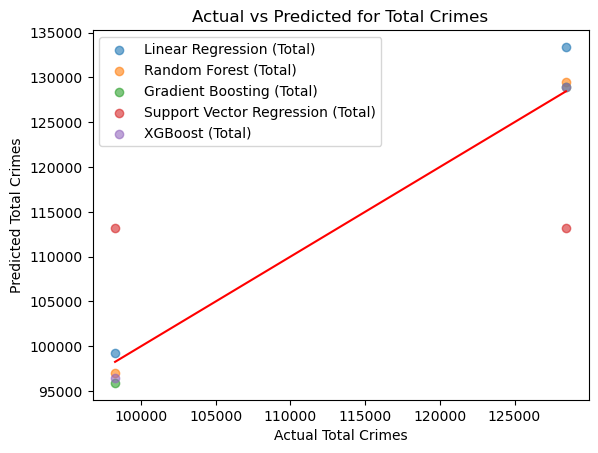

Linear Regression for Crime Rate Mean Squared Error: 8.808668123423672
Linear Regression for Crime Rate Accuracy: 0.853488141675327

Random Forest for Crime Rate Mean Squared Error: 2.1001622877660227
Random Forest for Crime Rate Accuracy: 0.9650686488294665

Gradient Boosting for Crime Rate Mean Squared Error: 3.3448112269447208
Gradient Boosting for Crime Rate Accuracy: 0.9443667871534669

Support Vector Regression for Crime Rate Mean Squared Error: 59.66436776047243
Support Vector Regression for Crime Rate Accuracy: 0.007620984935468367

XGBoost for Crime Rate Mean Squared Error: 1.6674571312599056
XGBoost for Crime Rate Accuracy: 0.9722657001541496



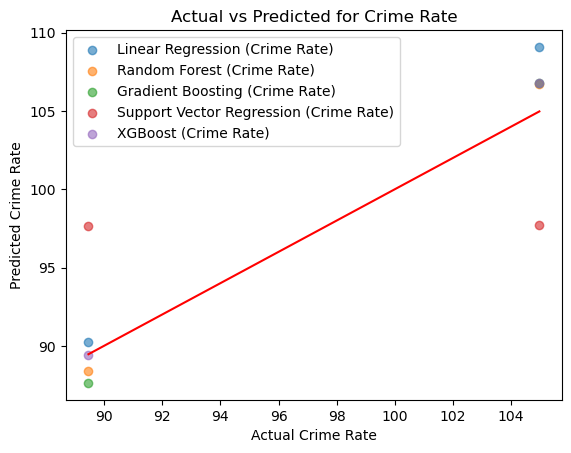

Linear Regression Future Predictions for Total Crimes: [10844.95379981 10927.48643641 11010.019073  ]
Random Forest Future Predictions for Total Crimes: [94.38139355 94.67669224 97.15492047]
Gradient Boosting Future Predictions for Total Crimes: [94.97033675 94.97033675 96.87394469]
Support Vector Regression Future Predictions for Total Crimes: [97.50712853 97.50711267 97.50709682]
XGBoost Future Predictions for Total Crimes: [107.29745 107.29745 107.29745]
Linear Regression Future Predictions for Crime Rate: [10844.95379981 10927.48643641 11010.019073  ]
Random Forest Future Predictions for Crime Rate: [94.38139355 94.67669224 97.15492047]
Gradient Boosting Future Predictions for Crime Rate: [94.97033675 94.97033675 96.87394469]
Support Vector Regression Future Predictions for Crime Rate: [97.50712853 97.50711267 97.50709682]
XGBoost Future Predictions for Crime Rate: [107.29745 107.29745 107.29745]


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Import XGBoost

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_total = merged_df['Total']
target_crime_rate = merged_df['Crime_Rate']

# Step 3: Split the data into training and testing sets for Total
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

# Step 4: Initialize models, including XGBoost
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),  # Using RBF kernel
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
}

# Step 5: Train, predict, and evaluate each model for Total
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_total, y_train_total)

    # Make predictions
    predictions_total = model.predict(X_test_total)

    # Evaluate the model
    mse_total = mean_squared_error(y_test_total, predictions_total)
    accuracy_total = model.score(X_test_total, y_test_total)

    print(f'{model_name} for Total Mean Squared Error: {mse_total}')
    print(f'{model_name} for Total Accuracy: {accuracy_total}\n')

    # Plotting actual vs predicted values for Total
    plt.scatter(y_test_total, predictions_total, label=f'{model_name} (Total)', alpha=0.6)

# Step 6: Formatting the plot for Total
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Actual vs Predicted for Total Crimes')
plt.plot([min(y_test_total), max(y_test_total)], [min(y_test_total), max(y_test_total)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 7: Split the data into training and testing sets for Crime Rate
X_train_crime_rate, X_test_crime_rate, y_train_crime_rate, y_test_crime_rate = train_test_split(features, target_crime_rate, test_size=0.2, random_state=42)

# Step 8: Train, predict, and evaluate each model for Crime Rate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_crime_rate, y_train_crime_rate)

    # Make predictions
    predictions_crime_rate = model.predict(X_test_crime_rate)

    # Evaluate the model
    mse_crime_rate = mean_squared_error(y_test_crime_rate, predictions_crime_rate)
    accuracy_crime_rate = model.score(X_test_crime_rate, y_test_crime_rate)

    print(f'{model_name} for Crime Rate Mean Squared Error: {mse_crime_rate}')
    print(f'{model_name} for Crime Rate Accuracy: {accuracy_crime_rate}\n')

    # Plotting actual vs predicted values for Crime Rate
    plt.scatter(y_test_crime_rate, predictions_crime_rate, label=f'{model_name} (Crime Rate)', alpha=0.6)

# Step 9: Formatting the plot for Crime Rate
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs Predicted for Crime Rate')
plt.plot([min(y_test_crime_rate), max(y_test_crime_rate)], [min(y_test_crime_rate), max(y_test_crime_rate)], color='red')  # Diagonal line
plt.legend()
plt.show()

# Step 10: Predicting future values for both targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for Total Crimes
for model_name, model in models.items():
    future_predictions_total = model.predict(future_years)
    print(f"{model_name} Future Predictions for Total Crimes: {future_predictions_total}")

# Predictions for Crime Rate
for model_name, model in models.items():
    future_predictions_crime_rate = model.predict(future_years)
    print(f"{model_name} Future Predictions for Crime Rate: {future_predictions_crime_rate}")



Evaluating model for: Total
Linear Regression for Total Mean Squared Error: 12717447.940858899
Linear Regression for Total Accuracy: 0.944179814266975

Random Forest for Total Mean Squared Error: 1311160.6099999868
Random Forest for Total Accuracy: 0.9942449751619677

Gradient Boosting for Total Mean Squared Error: 2857865.606590278
Gradient Boosting for Total Accuracy: 0.9874560847662397

Support Vector Regression for Total Mean Squared Error: 227854067.1223213
Support Vector Regression for Total Accuracy: -0.00011074595632543094

XGBoost for Total Mean Squared Error: 1704382.6250610352
XGBoost for Total Accuracy: 0.9925190210342407



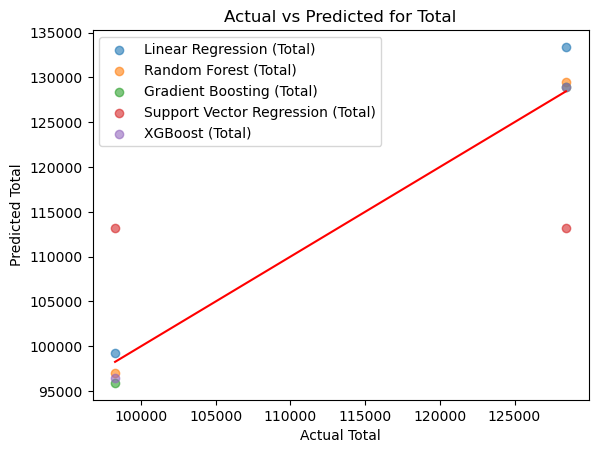


Evaluating model for: Rape_Cases_Reported
Linear Regression for Rape_Cases_Reported Mean Squared Error: 1388362.6006885797
Linear Regression for Rape_Cases_Reported Accuracy: 0.9449948130863345

Random Forest for Rape_Cases_Reported Mean Squared Error: 144220.58280000006
Random Forest for Rape_Cases_Reported Accuracy: 0.9942861611874467

Gradient Boosting for Rape_Cases_Reported Mean Squared Error: 317671.8554882772
Gradient Boosting for Rape_Cases_Reported Accuracy: 0.9874142390614113

Support Vector Regression for Rape_Cases_Reported Mean Squared Error: 25244099.723492924
Support Vector Regression for Rape_Cases_Reported Accuracy: -0.000139605510307117

XGBoost for Rape_Cases_Reported Mean Squared Error: 187406.28907203674
XGBoost for Rape_Cases_Reported Accuracy: 0.9925751686096191



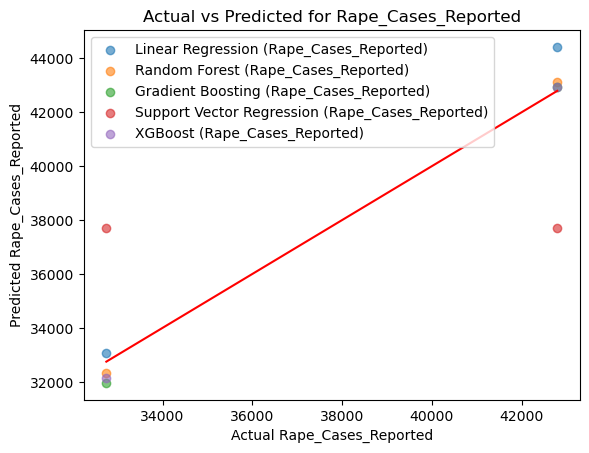


Evaluating model for: Victims_Above_50_Yrs
Linear Regression for Victims_Above_50_Yrs Mean Squared Error: 5497.29276018284
Linear Regression for Victims_Above_50_Yrs Accuracy: -5.536614459194816

Random Forest for Victims_Above_50_Yrs Mean Squared Error: 3313.460199999998
Random Forest for Victims_Above_50_Yrs Accuracy: -2.939905112960759

Gradient Boosting for Victims_Above_50_Yrs Mean Squared Error: 3365.2996591083906
Gradient Boosting for Victims_Above_50_Yrs Accuracy: -3.001545373493925

Support Vector Regression for Victims_Above_50_Yrs Mean Squared Error: 2774.57361663018
Support Vector Regression for Victims_Above_50_Yrs Accuracy: -2.2991362861238764

XGBoost for Victims_Above_50_Yrs Mean Squared Error: 3369.9581301067956
XGBoost for Victims_Above_50_Yrs Accuracy: -3.007084369659424



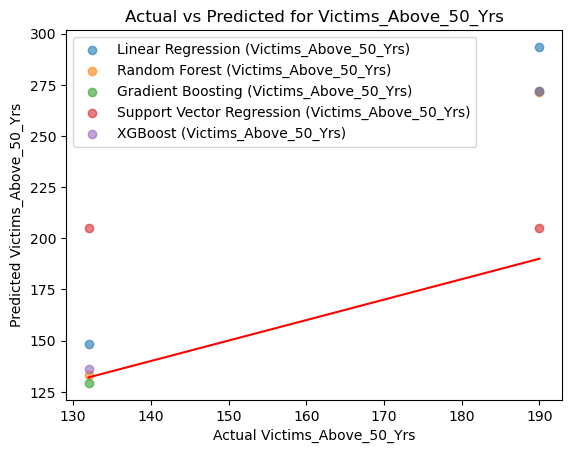


Evaluating model for: Victims_Between_10-14_Yrs
Linear Regression for Victims_Between_10-14_Yrs Mean Squared Error: 536308.1226618886
Linear Regression for Victims_Between_10-14_Yrs Accuracy: 0.3466318208973673

Random Forest for Victims_Between_10-14_Yrs Mean Squared Error: 586957.2051999999
Random Forest for Victims_Between_10-14_Yrs Accuracy: 0.2849275553216478

Gradient Boosting for Victims_Between_10-14_Yrs Mean Squared Error: 763143.6318774673
Gradient Boosting for Victims_Between_10-14_Yrs Accuracy: 0.07028489018821393

Support Vector Regression for Victims_Between_10-14_Yrs Mean Squared Error: 832684.4030198697
Support Vector Regression for Victims_Between_10-14_Yrs Accuracy: -0.014434555769812452

XGBoost for Victims_Between_10-14_Yrs Mean Squared Error: 1054872.0175790787
XGBoost for Victims_Between_10-14_Yrs Accuracy: -0.28511905670166016



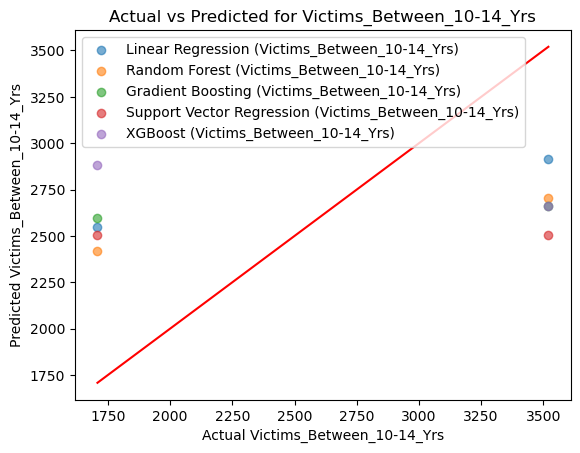


Evaluating model for: Victims_Between_14-18_Yrs
Linear Regression for Victims_Between_14-18_Yrs Mean Squared Error: 8352431.191033038
Linear Regression for Victims_Between_14-18_Yrs Accuracy: -2.3163400292122387

Random Forest for Victims_Between_14-18_Yrs Mean Squared Error: 6364437.22
Random Forest for Victims_Between_14-18_Yrs Accuracy: -1.5270053034084037

Gradient Boosting for Victims_Between_14-18_Yrs Mean Squared Error: 8883491.03156115
Gradient Boosting for Victims_Between_14-18_Yrs Accuracy: -2.5271977982581175

Support Vector Regression for Victims_Between_14-18_Yrs Mean Squared Error: 7712346.213698248
Support Vector Regression for Victims_Between_14-18_Yrs Accuracy: -2.0621937352910513

XGBoost for Victims_Between_14-18_Yrs Mean Squared Error: 14056896.423829198
XGBoost for Victims_Between_14-18_Yrs Accuracy: -4.581302642822266



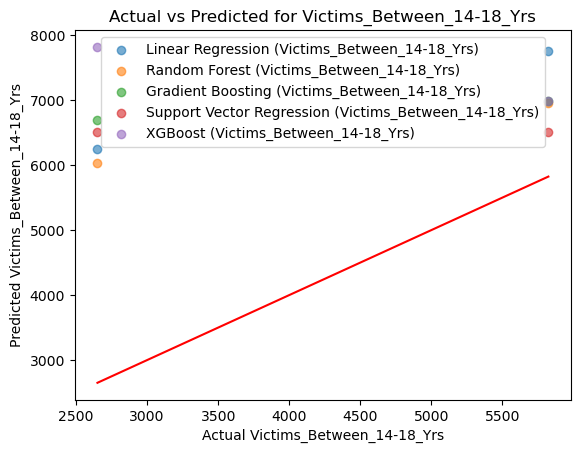


Evaluating model for: Victims_Between_18-30_Yrs
Linear Regression for Victims_Between_18-30_Yrs Mean Squared Error: 6406196.067569468
Linear Regression for Victims_Between_18-30_Yrs Accuracy: -0.47787865330513957

Random Forest for Victims_Between_18-30_Yrs Mean Squared Error: 7188606.160199998
Random Forest for Victims_Between_18-30_Yrs Accuracy: -0.6583769024740671

Gradient Boosting for Victims_Between_18-30_Yrs Mean Squared Error: 11318020.426977376
Gradient Boosting for Victims_Between_18-30_Yrs Accuracy: -1.6110129334595178

Support Vector Regression for Victims_Between_18-30_Yrs Mean Squared Error: 5121343.409086735
Support Vector Regression for Victims_Between_18-30_Yrs Accuracy: -0.18146931825111245

XGBoost for Victims_Between_18-30_Yrs Mean Squared Error: 16759925.310553074
XGBoost for Victims_Between_18-30_Yrs Accuracy: -2.866434097290039



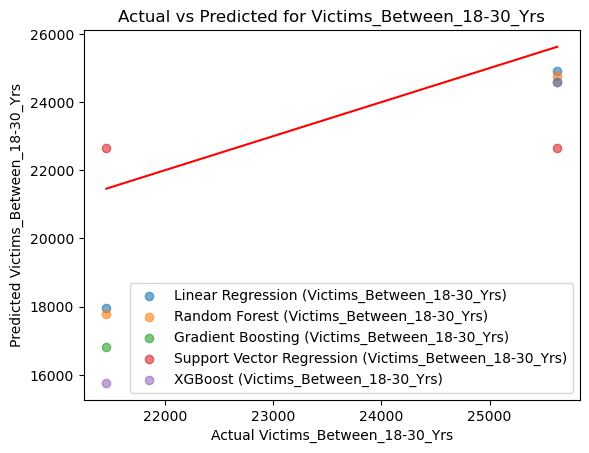


Evaluating model for: Victims_Between_30-50_Yrs
Linear Regression for Victims_Between_30-50_Yrs Mean Squared Error: 928746.7926073843
Linear Regression for Victims_Between_30-50_Yrs Accuracy: -52.30273143981774

Random Forest for Victims_Between_30-50_Yrs Mean Squared Error: 908774.6371999998
Random Forest for Victims_Between_30-50_Yrs Accuracy: -51.15648744260788

Gradient Boosting for Victims_Between_30-50_Yrs Mean Squared Error: 1133720.9991420954
Gradient Boosting for Victims_Between_30-50_Yrs Accuracy: -64.06663218216801

Support Vector Regression for Victims_Between_30-50_Yrs Mean Squared Error: 223538.49502868898
Support Vector Regression for Victims_Between_30-50_Yrs Accuracy: -11.829344296871499

XGBoost for Victims_Between_30-50_Yrs Mean Squared Error: 1530270.269532442
XGBoost for Victims_Between_30-50_Yrs Accuracy: -86.82542419433594



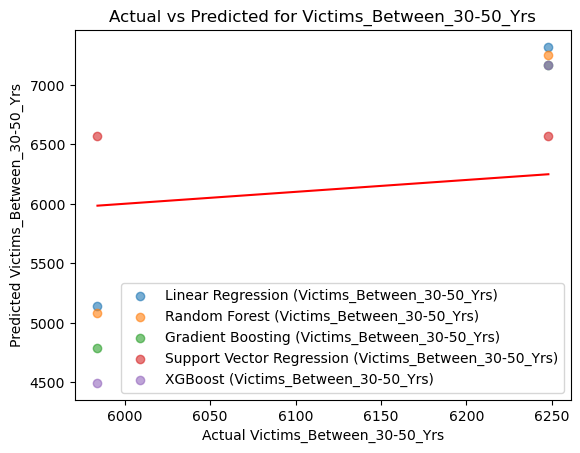


Evaluating model for: Victims_of_Rape_Total
Linear Regression for Victims_of_Rape_Total Mean Squared Error: 1425475.1918689506
Linear Regression for Victims_of_Rape_Total Accuracy: 0.943770954189829

Random Forest for Victims_of_Rape_Total Mean Squared Error: 146429.7991999985
Random Forest for Victims_of_Rape_Total Accuracy: 0.9942239556786704

Gradient Boosting for Victims_of_Rape_Total Mean Squared Error: 317477.8304976345
Gradient Boosting for Victims_of_Rape_Total Accuracy: 0.9874768248675306

Support Vector Regression for Victims_of_Rape_Total Mean Squared Error: 25353278.701383352
Support Vector Regression for Victims_of_Rape_Total Accuracy: -8.100994659443472e-05

XGBoost for Victims_of_Rape_Total Mean Squared Error: 190366.26563453674
XGBoost for Victims_of_Rape_Total Accuracy: 0.992490828037262



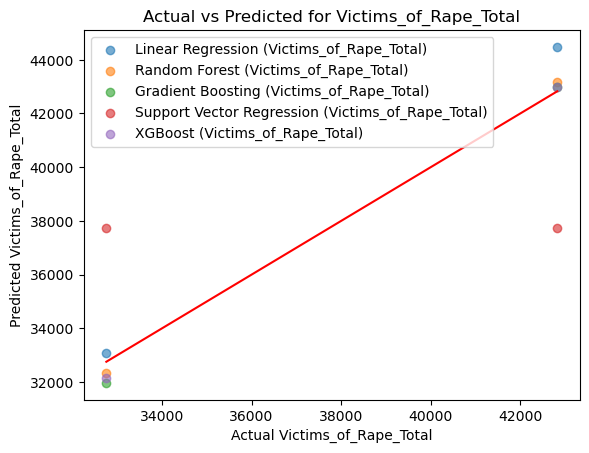


Evaluating model for: Victims_Upto_10_Yrs
Linear Regression for Victims_Upto_10_Yrs Mean Squared Error: 30656.52698413287
Linear Regression for Victims_Upto_10_Yrs Accuracy: 0.6570896636040663

Random Forest for Victims_Upto_10_Yrs Mean Squared Error: 25711.460000000014
Random Forest for Victims_Upto_10_Yrs Accuracy: 0.7124029932551088

Gradient Boosting for Victims_Upto_10_Yrs Mean Squared Error: 16890.264681829747
Gradient Boosting for Victims_Upto_10_Yrs Accuracy: 0.81107297813414

Support Vector Regression for Victims_Upto_10_Yrs Mean Squared Error: 90400.7921319847
Support Vector Regression for Victims_Upto_10_Yrs Accuracy: -0.01118323208895533

XGBoost for Victims_Upto_10_Yrs Mean Squared Error: 38404.13818491995
XGBoost for Victims_Upto_10_Yrs Accuracy: 0.5704283714294434



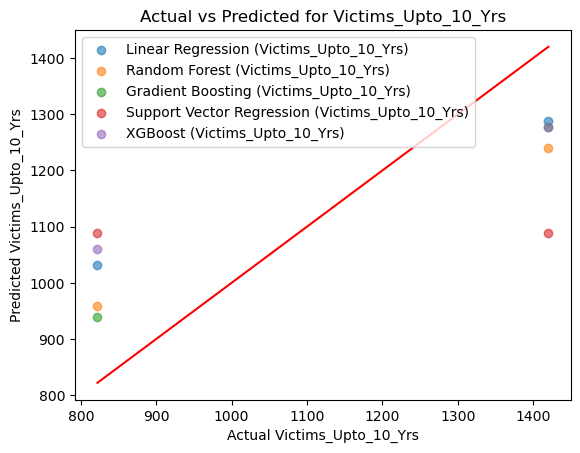

Linear Regression Future Predictions for Total: [467289.75046321 470809.71255231 474329.67464143]
Random Forest Future Predictions for Total: [1011.8  1012.42 1071.54]
Gradient Boosting Future Predictions for Total: [1047.24658784 1047.24658784 1098.80724314]
Support Vector Regression Future Predictions for Total: [1088.84377142 1088.84375732 1088.84374322]
XGBoost Future Predictions for Total: [1142.0005 1142.0005 1142.0005]
Linear Regression Future Predictions for Rape_Cases_Reported: [467289.75046321 470809.71255231 474329.67464143]
Random Forest Future Predictions for Rape_Cases_Reported: [1011.8  1012.42 1071.54]
Gradient Boosting Future Predictions for Rape_Cases_Reported: [1047.24658784 1047.24658784 1098.80724314]
Support Vector Regression Future Predictions for Rape_Cases_Reported: [1088.84377142 1088.84375732 1088.84374322]
XGBoost Future Predictions for Rape_Cases_Reported: [1142.0005 1142.0005 1142.0005]
Linear Regression Future Predictions for Victims_Above_50_Yrs: [467289

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb  # Import XGBoost

# Step 1: Load your data (ensure merged_df is defined)
# merged_df = pd.read_csv('your_merged_data.csv')  # Uncomment and load your data here

# Step 2: Define features and target variables
features = merged_df[['Year', 'Population', 'Literacy Rate']]
target_columns = ['Total','Rape_Cases_Reported','Victims_Above_50_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs','Victims_of_Rape_Total','Victims_Upto_10_Yrs']

# Step 3: Split the data into training and testing sets for each crime type
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),  # Using RBF kernel
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)  # XGBoost model
}

# Step 4: Train, predict, and evaluate each model for each target
for target in target_columns:
    target_values = merged_df[target]
    X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)

    print(f"\nEvaluating model for: {target}")

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

        # Evaluate the model
        mse = mean_squared_error(y_test, predictions)
        accuracy = model.score(X_test, y_test)

        print(f'{model_name} for {target} Mean Squared Error: {mse}')
        print(f'{model_name} for {target} Accuracy: {accuracy}\n')

        # Plotting actual vs predicted values
        plt.scatter(y_test, predictions, label=f'{model_name} ({target})', alpha=0.6)

    # Step 5: Formatting the plot for each target
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted for {target}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.legend()
    plt.show()

# Step 6: Predicting future values for all targets
future_years = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Population': [1050000, 1100000, 1150000],  # Example future populations
    'Literacy Rate': [66, 67, 68]  # Example future literacy rates
})

# Predictions for all crime types
for target in target_columns:
    target_values = merged_df[target]
    
    for model_name, model in models.items():
        future_predictions = model.predict(future_years)
        print(f"{model_name} Future Predictions for {target}: {future_predictions}")
